# Various examples of Plotting a Spectrum

In [1]:
import matplotlib.pyplot as plt

import becquerel as bq
from becquerel import SpectrumPlotter

spec1 = bq.Spectrum.from_file("../tests/samples/1110C NAA cave pottery.Spe")
spec2 = bq.Spectrum.from_file("../tests/samples/Mendocino_07-10-13_Acq-10-10-13.Spe")

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe
SpeFile: Reading file ../tests/samples/Mendocino_07-10-13_Acq-10-10-13.Spe


## Spectrum plot method

A spectrum has a plot method now. By default it plots a spectrum on a linear scale and adds the filename of the spectrum if available as a title. The x axes is in keV if calibrated, otherwise in channels. The y axis is in counts or cps.

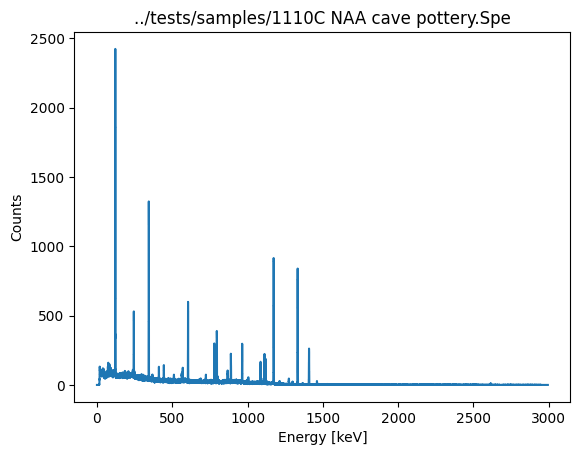

In [2]:
spec1.plot()
plt.show()

It can take a xmode and ymode argument to define what will be plotted on the respective axis. It also takes a yscale ('linear', 'log', 'logit', 'symlog') and a title argument. Furthermore, limits can be passed to the plot function; if set to 'default' it will do some internal scaling and overwrite the matplotlib methods. The x and y labels can be overwritten too.

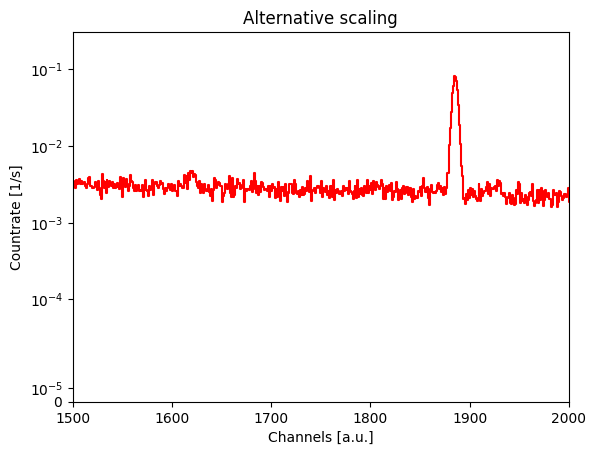

In [3]:
spec1.plot(
    "-r",
    xmode="channel",
    ymode="cps",
    yscale="symlog",
    xlim=(1500, 2000),
    ylim="default",
    title="Alternative scaling",
    xlabel="Channels [a.u.]",
)
plt.show()

A spectrum also has a fill_between method and can take an axes object. If multiple spectrum are plotted, the last call will overwrite the arguments of previous calls (title, yscale). Any matplotlib's plot and fill_between keyword arguments can be passed to the plotting functions.

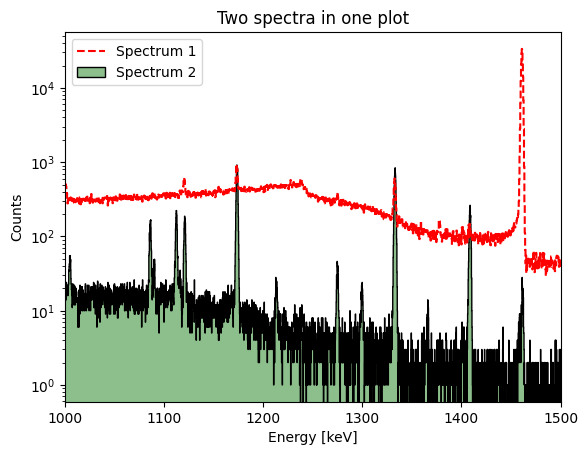

In [4]:
fig, ax = plt.subplots()
ax.set_xlim((1000, 1500))
spec2.plot("--", xmode="keV", ymode="cnt", ax=ax, label="Spectrum 1", color="red")
spec1.fill_between(
    xmode="energy",
    ymode="counts",
    ax=ax,
    yscale="log",
    title="Two spectra in one plot",
    label="Spectrum 2",
    edgecolor="black",
    facecolor=(0.1, 0.5, 0.1, 0.5),
)
plt.legend()
plt.show()

The plotting command returns an axis object, which can be used to change plot properties.

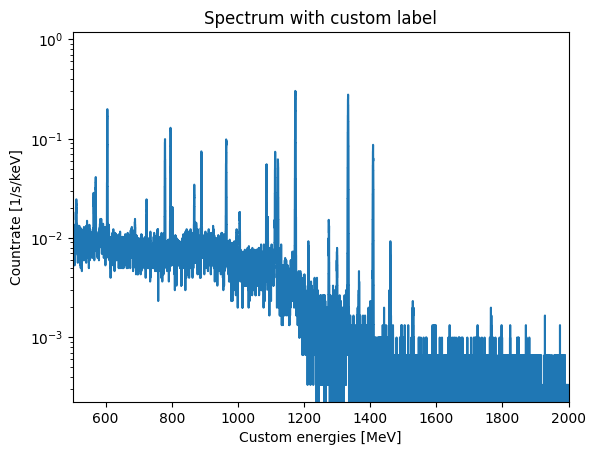

In [5]:
ax = spec1.plot(
    xmode="energy", ymode="cpskev", yscale="log", title="Spectrum with custom label"
)
ax.set_xlabel("Custom energies [MeV]")
ax.set_xlim((500, 2000))
plt.show()

## The SpectrumPlotter class
There is also a SpectrumPlotter which is quite powerful and can be used for producing custom matplotlib plots of Spectrums. There are additional methods available such as get_corners() and properties such as xlim, ylim, linthresh. If the matplotlib default values are not good enough these might be the ones you want.

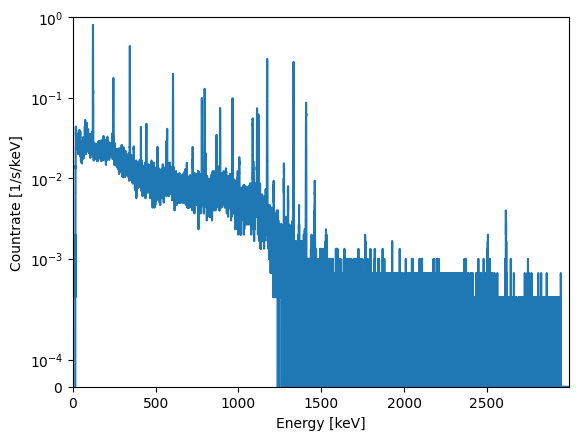

In [6]:
plt.figure()
sp = SpectrumPlotter(spec1, xmode="energy", ymode="cpskev", yscale="symlog")
xcorners, ycorners = sp.get_corners()
plt.plot(xcorners, ycorners)
plt.xlabel(sp.xlabel)
plt.ylabel(sp.ylabel)
plt.yscale("symlog", linthresh=sp.linthresh)
plt.xlim(sp.xlim)
plt.ylim(sp.ylim)
plt.show()

The SpectrumPlotter class has it's own plot and fill_between method. They also take matplotlib function keyword arguments, which overwrite previously defined properties. This is what the Spectrum plot and fill_between call do.

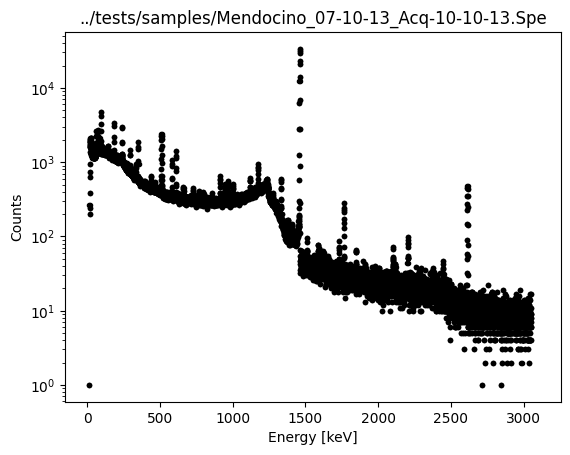

In [7]:
SpectrumPlotter(spec2, yscale="log", color="red").plot(".", color="black")
plt.show()

The plot can also be configured by using the SpectrumPlotters setter methods. This is how the class is implemented internally.

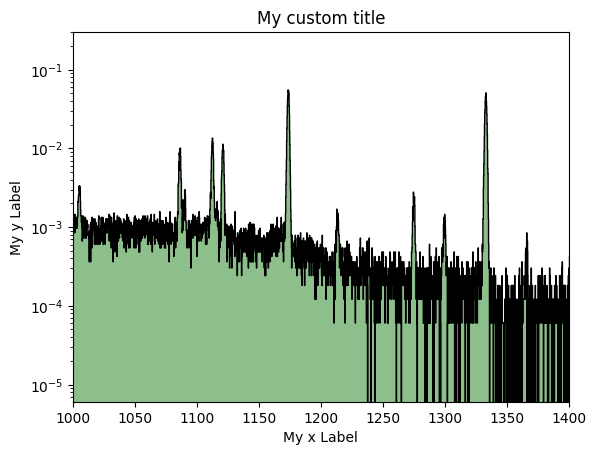

In [8]:
fig, ax = plt.subplots()
sp = SpectrumPlotter(spec1)
sp.ax = ax
sp.xlabel = "My x Label"
sp.ylabel = "My y Label"
sp.xlim = (1000, 1400)
sp.yscale = "log"
sp.ylim = "default"
sp.xmode = "energy"
sp.ymode = "cps"
sp.title = "My custom title"
sp.fill_between(edgecolor="black", facecolor=(0.1, 0.5, 0.1, 0.5))
plt.show()

## Errorbars and errorbands

It is also possible to create error bands and errorbars with the plot method:

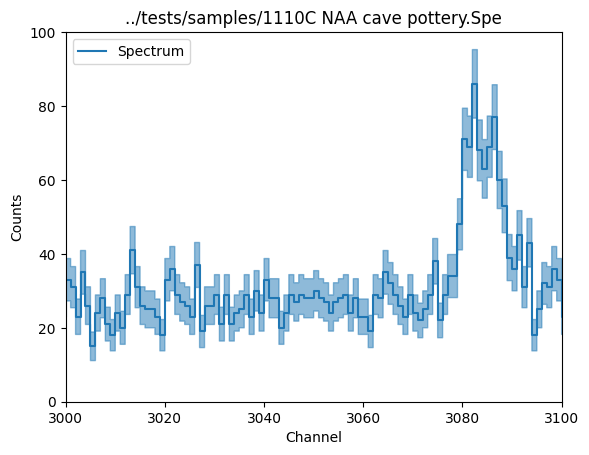

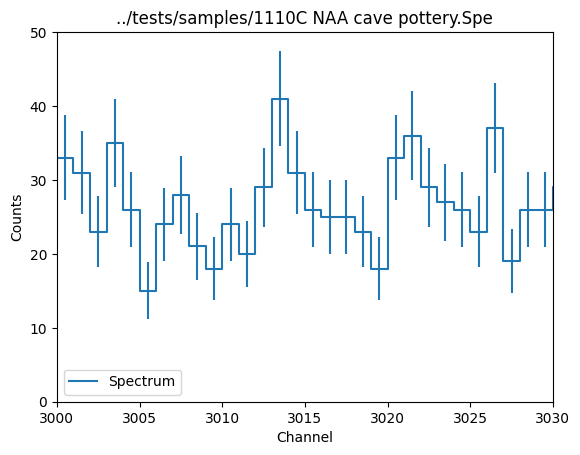

In [9]:
spec1.plot(
    xmode="channel",
    ymode="counts",
    emode="band",
    xlim=(3000, 3100),
    ylim=(0, 100),
    label="Spectrum",
)
plt.legend(loc=2)
spec1.plot(
    xmode="channel",
    ymode="counts",
    emode="bars",
    xlim=(3000, 3030),
    ylim=(0, 50),
    label="Spectrum",
)
plt.legend(loc=3)
plt.show()

The control of the errorbars and bands is quite limited with the Spectrum.plot function (it also suppresses a legend entry as you can see above); for more advanced uses, use the SpectrumPlotter class and its errorband and errorbar function

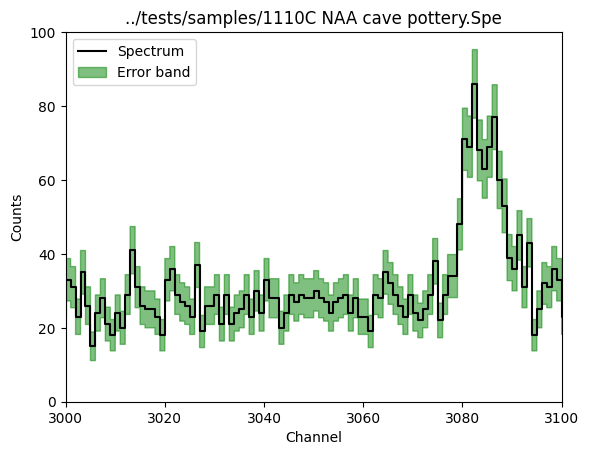

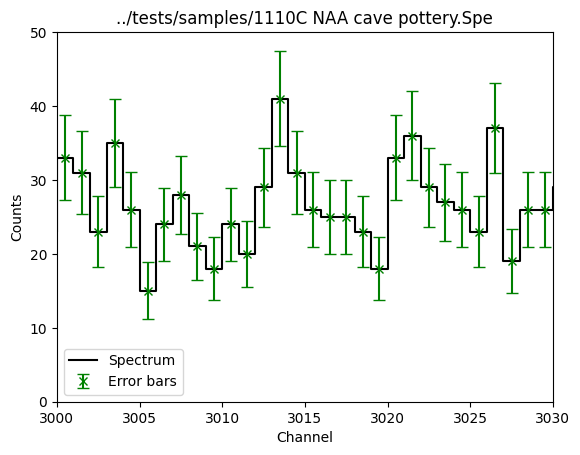

In [10]:
sp = SpectrumPlotter(
    spec1, xmode="channel", ymode="counts", xlim=(3000, 3100), ylim=(0, 100)
)
sp.plot(color="black", label="Spectrum")
sp.errorband(color="green", label="Error band")
plt.legend(loc=2)


sp = SpectrumPlotter(
    spec1, xmode="channel", ymode="counts", xlim=(3000, 3030), ylim=(0, 50)
)
sp.plot(color="black", label="Spectrum")
sp.errorbar(color="green", capsize=4, fmt="x", label="Error bars")
plt.legend(loc=3)

plt.show()